## Aggregation File 

In this notebook we aggregate the key components of the analysis that we are interested in. They are not meant to be running consecutively, but rather to be used as a reference for the overall analysis that takes place. 

Here is a list of data sources used (or planned to be used) in this notebook:
- For Country shape files  [1](https://gadm.org/index.html)
-  For global population data [2](https://ghsl.jrc.ec.europa.eu/download.php?ds=pop)
- For spatially harmonized critical infrastructure data visit [3](https://zenodo.org/records/4957647)
- For gridded spatial deprivation index visit [4](https://sedac.ciesin.columbia.edu/data/set/povmap-grdi-v1)<br>
- For urban aglomoration data visit [7](https://africapolis.org/en)
========================================================================
- For access to harmonized NTL visit [5](https://figshare.com/articles/dataset/Harmonization_of_DMSP_and_VIIRS_nighttime_light_data_from_1992-2018_at_the_global_scale/9828827/2?file=17626016)
- For access to global 1x1km GDP estimates visit [6](https://figshare.com/articles/dataset/Global_1_km_1_km_gridded_revised_real_gross_domestic_product_and_electricity_consumption_during_1992-2019_based_on_calibrated_nighttime_light_data/17004523/1?file=31456837)
- For access to global 1x1km electricity Consumption estimates visit [6](https://figshare.com/articles/dataset/Global_1_km_1_km_gridded_revised_real_gross_domestic_product_and_electricity_consumption_during_1992-2019_based_on_calibrated_nighttime_light_data/17004523/1?file=31456837)


Sources [3] and [4] are currently not included in the analysis. However they should be added similar to the population data as single datapoint for each grid cell through averaging/summing.
Similarly, sources [5] and electricity consumption of [6] should be added similar to the generated time series data for each cell of gdp.<br>




Before running make sure to activate the environment via the following command:<br>
<br>
REMARK: *(On my local machine i was not able to resolve a dependency issue with fiona in the virtual environment)*<br>

source myenv/bin/activate




In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
#import random
#import PIL
import rasterio
#import shapefile
import geopandas as gpd
import matplotlib.pyplot as plt
#from PIL import Image
#from pyproj import Transformer
from rasterio import features
from rasterio.enums import Resampling
from rasterio.mask import mask, raster_geometry_mask
from rasterio.plot import show
from shapely.geometry import Polygon, MultiPolygon, mapping,Point
#from skimage.measure import block_reduce
#from matplotlib.collections import PatchCollection
#from matplotlib.colors import Normalize
#from matplotlib.colors import LogNorm
#from bridson import poisson_disc_samples
#import matplotlib.patches as patches
#import scienceplots 
import os 
import Tesselation as tess
#import ipykernel
import sys


In [2]:
# import config and sampling methods
import tesslib as ts

In [3]:
region_geom = ts.get_region_geometry(["Europe"])

In [ ]:
tess.get_pop_density_for_geodf(region_geom)

After importing the necessary libraries, we take a look at the tif files for NTL at different locations. 


In [ ]:
# location_list = [
#     ("Delhi", (28.7041, 77.1025)),
#     ("Amsterdam", (52.3676, 4.9041)),
#     ("Europe", (51.2277, 6.7735)),
#     ("Abuja", (9.0765, 7.3986))
# ]

# raster_file_path = '../Data_summary/NTL/Harmonized_DN_NTL_2008_calDMSP.tif'
# tess.plot_geographic_snapshots(location_list, raster_file_path, buffer_pixels=500)
# #this can be similarly extended to other datasets as well!


In [13]:
# Read the config file.
config = ts.load_config('./tesslib/config/config_template.yml')
# extract sampling configuration
sampling_config = config["sampling"]
sample_configs = ts.get_sample_configs(sampling_config,config_file=config["config_file"])

# Expected attributes per config:
# * id                  (to define sample file names)
# * country codes       (to determine shape to process)
# * mode (grid, pdf, none)
# * repeats
# * min_distance
# * max_samples

reached


In [5]:
#create output directory structures
out_dir_root = config["output_root_directory"]
out_dir_name = config["output_directory_name"]
if out_dir_root is None:
    out_dir_root = "../"

out_dir_path=ts.set_output_dir(out_dir_root,out_dir_name)


In [7]:
#%%time
#Use Population density of selected region to sample points 
raster_path = '../Data_summary/POP/selection.tif'
#raster_path = '../Data_summary/GDP/1992/1992GDP.tif'
probability_gdf = tess.raster_to_spatial_probability_distribution(raster_path, power=2)

#Create far away points.
far_points = gpd.GeoDataFrame(geometry=gpd.points_from_xy([180.0,-180,-180,180] ,[90.0, 90,-90,-90]))

In [15]:
#sconfig = sample_configs[15]

In [16]:
#combined_geo_df = ts.get_region_geometry(sconfig.country_codes)
#combined_geo_df_boundary = combined_geo_df.geometry[0]

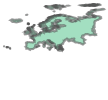

In [17]:
#combined_geo_df_boundary

In [18]:
#r=1

In [19]:
#cid = f'S{sconfig.id}_R{r}'

In [ ]:
#probability_gdf["probability"][0]

In [20]:
#type(sconfig.number_points)

numpy.int64

In [22]:
#points = ts.poisson_disk_sampling(probability_gdf, sconfig.mode, weights='probability', radius=sconfig.min_distance, n_samples=sconfig.number_points)

In [23]:
#points


,geometry
0,POINT (-8.28875 41.23708)
1,POINT (22.27792 43.92042)
2,POINT (-0.33875 39.46208)
3,POINT (12.30292 55.64542)
4,POINT (-8.31375 41.37875)
...,...
277,POINT (-0.08875 51.56208)
278,POINT (0.35292 51.42875)
279,POINT (23.55292 42.72875)
280,POINT (-8.59708 41.12875)


In [24]:
#points = pd.concat([far_points, points], ignore_index=True)

/Users/eslt0101/mambaforge/envs/gdp/lib/python3.11/site-packages/geopandas/array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


In [25]:
#points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- lat[north]: Latitude (degree)
- lon[east]: Longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
#points.to_file(f"{out_dir_path}/points_{cid}.geojson", driver='GeoJSON')

In [27]:
#voronoi_gdf = tess.create_voronoi_gdf(points, combined_geo_df_boundary)

In [28]:
#voronoi_gdf.to_file(f"{out_dir_path}/voronoi_{cid}.geojson", driver='GeoJSON')

In [32]:
#voronoi_gdf=gpd.read_file(f"{out_dir_path}/voronoi_{cid}.geojson")

In [33]:
#voronoi_gdf

,geometry
0,"POLYGON ((-8.46777 41.27853, -5.88198 41.73485..."
1,"POLYGON ((23.88459 46.23061, 24.10773 44.60027..."
2,"MULTIPOLYGON (((-1.74304 39.17940, -1.69058 40..."
3,"MULTIPOLYGON (((10.12830 63.98013, 10.12000 63..."
4,"POLYGON ((-5.71954 42.50374, -5.70750 42.46711..."
...,...
277,"POLYGON ((-0.09608 51.51280, -0.15234 51.55031..."
278,"MULTIPOLYGON (((0.97835 51.33138, 0.25358 51.0..."
279,"POLYGON ((21.94218 40.83251, 22.80031 43.20143..."
280,"POLYGON ((-8.45910 41.22899, -8.42802 41.14051..."


In [34]:
#attributed_voronoi_gdf = tess.attribute_values_to_voronoi_cells(voronoi_gdf, probability_gdf, 'probability')

/Users/eslt0101/mambaforge/envs/gdp/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['geometry', 'index_right', 'probability'], dtype='object')


/Users/eslt0101/Projects/REPOS/eScience/SDCCA/GDP/eScience/Code/Tesselation.py:332: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  voronoi_gdf[value_name].fillna(0, inplace=True)


In [35]:
#attributed_voronoi_gdf

,geometry,probability
0,"POLYGON ((-8.46777 41.27853, -5.88198 41.73485...",0.000687
1,"POLYGON ((23.88459 46.23061, 24.10773 44.60027...",0.002356
2,"MULTIPOLYGON (((-1.74304 39.17940, -1.69058 40...",0.008239
3,"MULTIPOLYGON (((10.12830 63.98013, 10.12000 63...",0.001980
4,"POLYGON ((-5.71954 42.50374, -5.70750 42.46711...",0.001352
...,...,...
277,"POLYGON ((-0.09608 51.51280, -0.15234 51.55031...",0.003907
278,"MULTIPOLYGON (((0.97835 51.33138, 0.25358 51.0...",0.001926
279,"POLYGON ((21.94218 40.83251, 22.80031 43.20143...",0.007890
280,"POLYGON ((-8.45910 41.22899, -8.42802 41.14051...",0.001279


In [36]:
#year=1993

In [37]:
#rp2= f'../Data_summary/GDP/{year}/{year}GDP.tif'

In [39]:
#gdp_value_name = f'gdp_{year}'

In [46]:
"""
with rasterio.open(rp2) as src:
    seldata, seldata_transform = rasterio.mask.mask(src,combined_geo_df.geometry,crop=True)
    a=src.read(1,masked=True)
    print(type(seldata))
    print(type(a))
    
    print(a.fill_value)
    gdp_gdf = ts.raster_to_gdf(seldata,name=gdp_value_name)
"""    

<class 'numpy.ndarray'>
<class 'numpy.ma.core.MaskedArray'>
-3.402823e+38


AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [ ]:
# - per strategy loop
#     - per ensemble point
#         - create extended bounding box points to avoid infinite voronoi cells (eg. first four points special case) (print(combined_geo_df.bounds))
#         - create point sample
#         - save point sample (have naming convention for strategy and ensemble)
#         - create voronoi diagram
#         - save voronoi diagram (have naming convention for strategy and ensemble)


for config in sample_configs:
    #Country code can be found in the folder "Data_summary/country_geometry" in the file "Country_codes.csv"
    #In the same folder we have the shapefiles for the countries as well
    
    # Create a joint shape file out of the country list.
    #country_codes = ["NL1", "BEL", "DEU"]
    combined_geo_df = tess.get_combined_country_geometry(config.country_codes)
    combined_geo_df_boundary = combined_geo_df.geometry[0]

    #tess.visualize_geometry(combined_geo_df) 
    
    #Save the population density of the combined countries
    #tess.get_pop_density_for_geodf(combined_geo_df)
    
    for r in range(config.ensemble_size):
        cid = f'S{config.id}_R{r}'
        
        if config.mode == 'grid':
            #TODO implement grid sampling
            points = tess.grid_sampling_with_geodf(size=config.radius)
        elif config.mode == 'density':
            points = ts.poisson_disk_sampling(probability_gdf, config.mode, weights='probability', radius=config.min_distance, n_samples=config.number_points)
        elif config.mode == 'random':
            #TODO implement ramdom PD sampling
            points = ts.poisson_disk_sampling(probability_gdf, config.mode, radius=config.min_distance, filter_geom=combined_geo_df, n_samples=config.number_points)
        else:
            raise ValueError('specified mode value is not supported')

        #Add far points.
        points = pd.concat([far_points, points], ignore_index=True)

        # Save points to disk.
        points.to_file(f"{out_dir_path}/points_{cid}.geojson", driver='GeoJSON')

        # Visualize.
        #tess.visualize_with_population(points, raster_path)
        #print(len(points))

        # Create Voronoi diagram.
        voronoi_gdf = tess.create_voronoi_gdf(points, combined_geo_df_boundary)
        
        # Save Voronoi to disk.
        voronoi_gdf.to_file(f"{out_dir_path}/voronoi_{cid}.geojson", driver='GeoJSON')

        #tess.visualize_voronoi(voronoi_gdf, combined_geo_df_boundary)


## Attributing Values to the Grids

Starting with Population we start creating time-series data with the available datasets. <br>
<br>
**Annually:**    GDP, Electricity Consumption <br>
**Once:**    Population, Deprivation Index, Aggricultural GDP, harmonized critical infrastructure.<br>

In [ ]:
# - per strategy loop
#     - per ensemble point
#         - read voronoi diagram (for strategy and ensemble)
#         - assign data to each cell 
#         - save to geojson (with coherent naming convention for strategy and ensemble)


# Attribute values that have only one measurement over time
population_gdf = tess.raster_to_population_gdf(raster_path)

for config in sample_configs:
    for r in range(config.ensemble_size):
        cid = f'S{config.id}_R{r}'
        
        # Load Voronoi from disk.
        voronoi_gdf=gpd.read_file(f"{out_dir_path}/voronoi_{cid}.geojson")

        # Attribute values.
        attributed_voronoi_gdf = tess.attribute_values_to_voronoi_cells(voronoi_gdf, population_gdf, 'population')

        # Save attributed Voronoi to disk.
        attributed_voronoi_gdf.to_file(f"{out_dir_path}/voronoi_attr_{cid}.geojson", driver='GeoJSON')



In [ ]:
# - per year
#     - read data for year (eg.GDP)
#     - per strategy loop
#         - per ensemble point
#             - read voronoi diagram (for strategy and ensemble)
#             - assign data to each cell 
#             - save to geojson (with coherent naming convention for strategy and ensemble)


# Attribute values that have multiple measurements over time

# List of years to process
start_year=1993
end_year=1997
years = list(range(start_year, end_year))
for year in years:
    # Read attribute data for this year.
    raster_path = f'../Data_summary/GDP/{year}/{year}GDP.tif'
    #output_raster_path = f'../Data_summary/POP/gdp_selection_{year}.tif'
    #tess.selection_of_tif_for_geodf(combined_geo_df, raster_path, output_raster_path)
    #gdp_gdf = tess.raster_to_gdf(output_raster_path, name=f'gdp_{year}')
    gdp_value_name = f'gdp_{year}'  # Dynamic column name for the GDP data
    with rasterio.open(rasterpath) as src:

        for config in sample_configs:
            combined_geo_df = tess.get_combined_country_geometry(config.country_codes)
            combined_geo_df_boundary = combined_geo_df.geometry[0]
            if combined_geo_df.crs != src.crs:
                combined_geo_df = combined_geo_df.to_crs(src.crs)

            seldata, seldata_transform = rasterio.mask.mask(src,combined_geo_df.geometry,crop=True)

            for r in range(config.ensemble_size):
                cid = f'S{config.id}_R{r}'

                #gdp_gdf = ts.raster_to_gdf(seldata,name=gdp_value_name)
                gdp_gdf = ts.gdf_to_raster(seldata,name=gdp_value_name,crs=src.crs)
            
                # Load Voronoi from disk.
                voronoi_gdf=gpd.read_file(f"{out_dir_path}/voronoi_attr_{cid}.geojson")

                # Attribute values.
                attributed_voronoi_gdf = tess.attribute_values_to_voronoi_cells(voronoi_gdf, gdp_gdf, gdp_value_name)

                # Save attributed Voronoi to disk.
                if year == end_year-1 :
                    pars=config.__dict__
                    pars.update({"start_year":start_year,"end_year":year,"ensemble_member":r})
                    attributed_voronoi_gdf=ts.append_metadata_to_gdf(attributed_voronoi_gdf,pars)
                    attributed_voronoi_gdf.to_file(f"{output_dir_path}/voronoi_{cid}_final.geojson", driver='GeoJSON')   
                else:
                    attributed_voronoi_gdf.to_file(f"{output_dir_path}/voronoi_{cid}.geojson", driver='GeoJSON')
                    

                #NOTE: The way the data is saved should include information about the parameters used to generate the data.
                #NOTE: The goal is time series data for each tesselation cell of the data of interest source [5] and [6]




## Open Tasks:

- Implement two more gridding techniques
- Establish pipline for: 
    - for each gridding technique
        - for each sampling density
            - save multiple griddings with corresponding time-series data
- Parallelize the process
- download the data from the sources
- solve issue with border gridd cells by adding additional vertices



In [ ]:
import os
import geopandas as gpd
import seaborn as sns
import networkx as nx
import json
from shapely.geometry import mapping

# Get the current working directory
current_dir = os.getcwd()
#print(current_dir)
# Construct the correct path to the file
file_path = os.path.join('/Users/mengeshi/Documents/GitHub/eScience/Data_summary/Tesselations/attributed_voronoi_all_years_1.geojson')

#read the file
gdf = gpd.read_file(file_path)


# Select only numeric columns
numeric_gdf = gdf.select_dtypes(include=[float, int])

#drop the population column
numeric_gdf = numeric_gdf.drop(columns=['population'])
# Calculate the differences between time steps
diff_gdf = numeric_gdf.diff()
#compute relative differences
relative_diff_gdf = numeric_gdf.pct_change()


# # Convert the differences DataFrame to a GeoDataFrame
# diff_gdf = gpd.GeoDataFrame(diff_gdf, geometry=gdf.geometry)

# # Remove the first row (NaN values)
# diff_gdf = diff_gdf.iloc[1:]



transposed_gdf = relative_diff_gdf.T

# Calculate the correlation matrix of the transposed DataFrame
row_correlation_matrix = transposed_gdf.corr()

#set correlation values below abs(0.75) to 0
adjusted_corr_m = row_correlation_matrix.applymap(lambda x: 0 if abs(x) < 0.85 else x)

#delete first row and column
adjusted_corr_m = adjusted_corr_m.iloc[1:, 1:]


#save the adjusted correlation matrix
adjusted_corr_m.to_csv('/Users/mengeshi/Documents/GitHub/eScience/Data_summary/Tesselations/adjusted_corr_matrix.csv')



# # Convert the adjusted correlation matrix to a networkx graph
# G = nx.from_pandas_adjacency(adjusted_corr_m)

# # Add the geometry information to the graph nodes
# for node in G.nodes:
#     #cell_id = node.split('_')[1]  # Extract the cell ID from the node name
#     geometry = gdf.loc[node, 'geometry']  # Get the geometry from the original GeoDataFrame
#     G.nodes[node]['geometry'] = mapping(geometry)# Convert the geometry to JSON format and add it to the node

# # Convert the graph to a GeoJSON file
# geojson_data = nx.readwrite.node_link_data(G)
# geojson_file_path = '/Users/mengeshi/Documents/GitHub/eScience/Data_summary/Tesselations/correlation_graph.geojson'
# with open(geojson_file_path, 'w') as f:
#     json.dump(geojson_data, f)







In [ ]:

import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
import numpy as np
from matplotlib.patches import FancyArrowPatch

def draw_network(G, pos, ax):
    # Get edge weights and calculate scaled widths
    weights = np.array([d['weight'] for (u, v, d) in G.edges(data=True)])
    widths = (weights - weights.min()) / (weights.max() - weights.min()) * 3 + 0.5

    # Iterate over edges to draw them with bezier curves
    for ((u, v, d), width) in zip(G.edges(data=True), widths):
        node_u_pos, node_v_pos = pos[u], pos[v]
        # Set color based on the sign of the weight
        edge_color = 'blue' if d['weight'] > 0 else 'red'
        # Create a bezier curved arrow for the edge
        arrow = FancyArrowPatch(node_u_pos, node_v_pos, arrowstyle='-',
                                color=edge_color, alpha=0.7,
                                mutation_scale=10.0,
                                linewidth=width, connectionstyle="arc3,rad=0.2")
        ax.add_patch(arrow)

# def visualize_voronoi_with_network(voronoi_gdf, boundary, centroids_gdf, correlation_matrix, threshold=0.5):
#     """
#     Visualizes the Voronoi GeoDataFrame alongside the boundary with an overlaid network
#     based on centroid points and a correlation matrix.

#     Parameters:
#     voronoi_gdf (geopandas.GeoDataFrame): GeoDataFrame of the Voronoi polygons.
#     boundary (shapely.geometry): Boundary geometry used for clipping.
#     centroids_gdf (geopandas.GeoDataFrame): GeoDataFrame containing centroid points.
#     correlation_matrix (numpy.array): Square matrix of correlation values between centroids.
#     threshold (float): Threshold for correlation to consider an edge between nodes.
#     """
#     # Set up the figure and style
#     fig, ax = plt.subplots(figsize=(10, 10))
#     plt.style.use(['science','ieee'])

#     # Plot boundary
#     boundary_gdf = gpd.GeoDataFrame(geometry=[boundary], crs="EPSG:4326")
#     boundary_gdf.boundary.plot(ax=ax, color="blue", linewidth=2)

#     # Plot Voronoi diagram
#     voronoi_gdf.plot(ax=ax, alpha=0.5, edgecolor='black', cmap='tab20b')

#     # Create a graph from the centroids and correlation matrix
#     G = nx.Graph()
#     positions = {idx: (point.x, point.y) for idx, point in enumerate(centroids_gdf.geometry)}
#     for idx, pos in positions.items():
#         G.add_node(idx, pos=pos)

#     # Add edges based on the correlation matrix
#     for i in range(len(correlation_matrix)):
#         for j in range(i + 1, len(correlation_matrix)):
#             if abs(correlation_matrix[i, j]) > threshold:
#                 G.add_edge(i, j, weight=abs(correlation_matrix[i, j]))

    

#     # Draw the network with variable edge width and improved color coding
#     pos = nx.get_node_attributes(G, 'pos')
#     edges = G.edges()
#     weights = np.array([G[u][v]['weight'] for u, v in edges])

#     # Normalize weights for edge width
#     widths = (weights - weights.min()) / (weights.max() - weights.min()) * 3 + 0.5  # Scale from 0.5 to 3.5

#     # Edge colors by weight
#     edge_colors = weights  # Directly use weights for color mapping

#     nx.draw(G, pos, ax=ax, node_size=50, node_color='red', 
#             edge_color=edge_colors, width=widths, edge_cmap=plt.cm.viridis, alpha=0.7)

#     plt.tight_layout()
#     plt.show()


def visualize_voronoi_with_network(voronoi_gdf, boundary, centroids_gdf, correlation_matrix, percentile=90):
    """
    Visualizes the Voronoi GeoDataFrame alongside the boundary with an overlaid network
    based on centroid points and a correlation matrix, filtering edges by top percentile.

    Parameters:
    voronoi_gdf (geopandas.GeoDataFrame): GeoDataFrame of the Voronoi polygons.
    boundary (shapely.geometry): Boundary geometry used for clipping.
    centroids_gdf (geopandas.GeoDataFrame): GeoDataFrame containing centroid points.
    correlation_matrix (numpy.array): Square matrix of correlation values between centroids.
    percentile (float): Percentile for filtering edges based on their weight (default 90).
    """
    # Setup the figure and plot boundary
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.style.use(['science','ieee'])
    boundary_gdf = gpd.GeoDataFrame(geometry=[boundary], crs="EPSG:4326")
    boundary_gdf.boundary.plot(ax=ax, color="black", linewidth=2)
    voronoi_gdf.plot(ax=ax, alpha=0.5, edgecolor='black', cmap='viridis')

    # Create and populate graph
    G = nx.Graph()
    positions = {idx: (point.x, point.y) for idx, point in enumerate(centroids_gdf.geometry)}
    for idx, pos in positions.items():
        G.add_node(idx, pos=pos)
    edges_weights = []
    for i in range(len(correlation_matrix)):
        for j in range(i + 1, len(correlation_matrix)):
            weight = abs(correlation_matrix[i, j])
            if weight > 0:  # Filter out non-connections
                edges_weights.append((i, j, weight))
    
    # Filter edges to include only top percentile
    edge_threshold = np.percentile([weight for _, _, weight in edges_weights], percentile)
    for i, j, weight in edges_weights:
        if weight >= edge_threshold:
            G.add_edge(i, j, weight=weight)

    # Draw the network with filtered edges
    pos = nx.get_node_attributes(G, 'pos')
    edges = G.edges()
    weights = np.array([G[u][v]['weight'] for u, v in edges])
    widths = (weights - weights.min()) / (weights.max() - weights.min()) * 3 + 0.5  # Scale edge width
    edge_colors = ['blue' if G[u][v]['weight'] > 0 else 'red' for u, v in G.edges()]  # Color by sign

    # nx.draw(G, pos, ax=ax, node_size=50, node_color='red', edge_color=edge_colors, width=widths, alpha=0.7)
    nx.draw_networkx_nodes(G, positions, node_color='red', node_size=50, ax=ax)
    # Draw bezier edges
    draw_network(G, positions, ax)

    
    plt.tight_layout()
    plt.show()




#read geodataframe
centroid_gdf = gpd.read_file('/Users/mengeshi/Documents/GitHub/eScience/Data_summary/Tesselations/tessellation_points_1.geojson')

visualize_voronoi_with_network(voronoi_gdf, boundary, centroid_gdf, adjusted_corr_m.values, percentile=97)



In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
import numpy as np
import matplotlib.cm as cm
from netgraph import Graph

def visualize_voronoi_with_network(voronoi_gdf, boundary, centroids_gdf, correlation_matrix, threshold=0.5):
    """
    Visualizes the Voronoi GeoDataFrame alongside the boundary with an overlaid network
    based on centroid points, correlation matrix, and community partitioning using dynamic coloring.

    Parameters:
    voronoi_gdf (geopandas.GeoDataFrame): GeoDataFrame of the Voronoi polygons.
    boundary (shapely.geometry): Boundary geometry used for clipping.
    centroids_gdf (geopandas.GeoDataFrame): GeoDataFrame containing centroid points.
    correlation_matrix (numpy.array): Square matrix of correlation values between centroids.
    threshold (float): Threshold for correlation to consider an edge between nodes.
    """
    # Set up the figure and style
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.style.use(['science','ieee'])

    # Plot boundary
    boundary_gdf = gpd.GeoDataFrame(geometry=[boundary], crs="EPSG:4326")
    boundary_gdf.boundary.plot(ax=ax, color="blue", linewidth=2)

    # Plot Voronoi diagram
    voronoi_gdf.plot(ax=ax, alpha=0.5, edgecolor='black', cmap='tab20b')

    # Create a graph from the centroids and correlation matrix
    G = nx.Graph()
    positions = {idx: (point.x, point.y) for idx, point in enumerate(centroids_gdf.geometry)}
    for idx, pos in positions.items():
        G.add_node(idx, pos=pos)

    # Add edges based on the correlation matrix
    for i in range(len(correlation_matrix)):
        for j in range(i + 1, len(correlation_matrix)):
            if abs(correlation_matrix[i, j]) > threshold:
                G.add_edge(i, j, weight=abs(correlation_matrix[i, j]))

    # Partition nodes randomly for demonstration
    num_communities = 10  # Define the number of communities
    partitions = [i % num_communities for i in range(len(centroids_gdf))]  # Partition logic
    node_to_community = {node: partitions[node] for node in G.nodes()}

    # Define a colormap and assign colors based on community ID
    cmap = cm.get_cmap('viridis', num_communities)
    node_color = {node: cmap(community) for node, community in node_to_community.items()}

    # Draw the network considering community structure
    nx.draw(G, positions, node_color=[node_color[n] for n in G.nodes()], width=0.1, edge_color='grey', alpha=0.5, with_labels=False, ax=ax)

    plt.tight_layout()
    plt.show()


#read geodataframe
centroid_gdf = gpd.read_file('/Users/mengeshi/Documents/GitHub/eScience/Data_summary/Tesselations/tessellation_points_1.geojson')

visualize_voronoi_with_network(voronoi_gdf, boundary, centroid_gdf, adjusted_corr_m.values, threshold=0.98)



In [ ]:
from idtxl.multivariate_te import MultivariateTE
from idtxl.data import Data
from idtxl.visualise_graph import plot_network

data = Data()
data.generate_mute_data(100, 5)
settings = {
    'cmi_estimator':  'JidtKraskovCMI',
    'n_perm_max_stat': 200,
    'n_perm_min_stat': 200,
    'n_perm_omnibus': 500,
    'n_perm_max_seq': 500,
    'max_lag_sources': 5,
    'min_lag_sources': 2
    }
network_analysis = MultivariateTE()
results = network_analysis.analyse_network(settings, data)